In [18]:
import os
import numpy as np
import pandas as pd

import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

from matplotlib import pyplot as plt
#%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode
import shutil
from PIL import Image  # To create gifs

from Mapfct import *     # Here is where we call the function.
from Crossfct import *   # Here is where we call the function.

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [21]:
ds = xr.open_mfdataset("ds_bio_chl.nc")
ds

<xarray.Dataset>
Dimensions:    (time: 96, latitude: 723, longitude: 491)
Coordinates:
    zc         float64 ...
  * time       (time) datetime64[ns] 2010-12-31T14:00:00 ... 2018-11-30T14:00:00
  * latitude   (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude  (longitude) float64 142.2 142.2 142.2 142.3 ... 156.8 156.8 156.9
Data variables:
    Chl_a_sum  (time, latitude, longitude) float32 dask.array<chunksize=(96, 723, 491), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.7 (Homepage...
    RunID:                           2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2021-09-08T01:59:05+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__GBR4_H2p0...
    ...                              ...
    paramfile:                       /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_C...
    paramhead:                       eReefs 4 km grid. SOURCE Catchments with...
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 BioGeoChemical 3....
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
ds1=ds.copy()
ds1

<xarray.Dataset>
Dimensions:    (time: 96, latitude: 723, longitude: 491)
Coordinates:
    zc         float64 ...
  * time       (time) datetime64[ns] 2010-12-31T14:00:00 ... 2018-11-30T14:00:00
  * latitude   (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude  (longitude) float64 142.2 142.2 142.2 142.3 ... 156.8 156.8 156.9
Data variables:
    Chl_a_sum  (time, latitude, longitude) float32 dask.array<chunksize=(96, 723, 491), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.7 (Homepage...
    RunID:                           2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2021-09-08T01:59:05+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__GBR4_H2p0...
    ...                              ...
    paramfile:                       /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_C...
    paramhead:                       eReefs 4 km grid. SOURCE Catchments with...
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 BioGeoChemical 3....
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
timeIndex = [i+1 for i in range(len(ds1.time))]

newDataArray = ds1.Chl_a_sum.assign_coords(time=timeIndex)
# newDataArray
res = newDataArray.polyfit(dim='time',deg=1)
res

<xarray.Dataset>
Dimensions:               (degree: 2, latitude: 723, longitude: 491)
Coordinates:
  * degree                (degree) int32 1 0
  * latitude              (latitude) float64 -28.7 -28.67 ... -7.066 -7.036
  * longitude             (longitude) float64 142.2 142.2 142.2 ... 156.8 156.9
Data variables:
    polyfit_coefficients  (degree, latitude, longitude) float64 dask.array<chunksize=(2, 723, 491), meta=np.ndarray>

In [6]:
# res.polyfit_coefficients.sel(degree=1).plot()

In [7]:
locA_lat = -27.405408
locA_lon = 153.783334
locB_lat = -24.321492
locB_lon = 153.491998
locC_lat = -20.309551
locC_lon = 151.150283
locD_lat = -17.50165
locD_lon = 146.911291
locE_lat = -12.084213
locE_lon = 144.081379

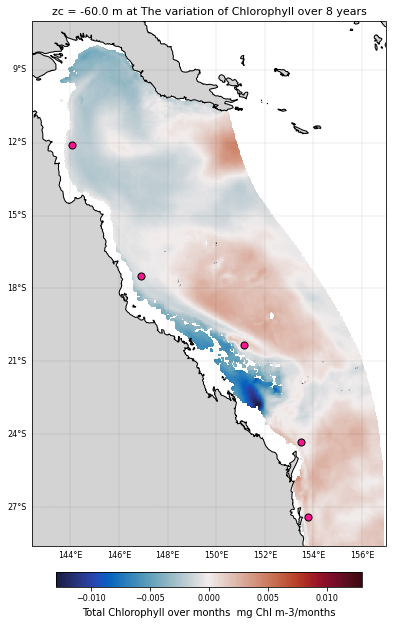

In [8]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.balance

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([142.4, 157, -7, -28.6], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PH at the surface at the final recorded time interval
cf = res.polyfit_coefficients.sel(degree=1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    
    add_colorbar=False
)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds.Chl_a_sum.long_name+' over months  '+ds.Chl_a_sum.units+'/months', rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds.zc.values.item(-1))+' m at The variation of Chlorophyll over 8 years',
          fontsize=11
         )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site
ax.scatter(locA_lon, locA_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())
ax.scatter(locB_lon, locB_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())
ax.scatter(locC_lon, locC_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())
ax.scatter(locD_lon, locD_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())
ax.scatter(locE_lon, locE_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())
plt.tight_layout()
plt.show()
# fig.clear()
# plt.close(fig)
# plt.clf()